# Code to plot and observe the raw data

Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
from scipy.optimize import curve_fit
import plotly.express as px

Define functions

In [2]:
def get_indices_in_range(lst, start, end):
    """
    Returns a new list containing only the indices of the values within the given range (inclusive).
    """
    return [i for i, x in enumerate(lst) if start <= x <= end]

def remove_indexes(my_list, indexes_to_remove):
    return [x for i, x in enumerate(my_list) if i not in indexes_to_remove]

def read_dat_file(filename,skip):
    data = np.loadtxt(filename+'.dat',skiprows= skip,encoding='unicode_escape') #utf-8-sig')
    col = []
    num = len(data.transpose())
    for i in range(num):
        if num == len(data):
            col1 = data[i]
        else:
            col1 = data[:,i]
        col.append(col1)

    return col

def gaussian(x, a, x0, sigma):
    """
    Gaussian function with amplitude a, mean x0, and standard deviation sigma.
    """
    return a * np.exp(-(x - x0)**2/ (2 * sigma**2))

def gaussian_double(x, a1, x01, sigma1, a2, x02, sigma2):
    """
    Gaussian function with amplitude a, mean x0, and standard deviation sigma.
    """
    return a1 * np.exp(-(x - x01)**2/ (2 * sigma1**2)) + a2 * np.exp(-(x - x02)**2/ (2 * sigma2**2))


def lorentzian(x, a, x0, sigma):
    """
    Returns the lorentzian function for the given parameters.
    """
    return (a * sigma**2) / ((x - x0) ** 2 + sigma ** 2)

def lorentzian_double(x, a1, x01, sigma1,a2, x02, sigma2):
    """
    Returns the lorentzian function for the given parameters.
    """
    return (a1 * sigma1**2) / ((x - x01) ** 2 + sigma1 ** 2) + (a2 * sigma1**2) / ((x - x02) ** 2 + sigma2 ** 2)


def my_round(x,dx):      # per avere dato + errore con le giuste cire significative (incertezza con una sola cifra significativa)  ---> da sistemare,quando dx salta di cifra x resta arrotondato a cifra sotto
    round_x = []
    if np.size(x) > 1:
        for i in range(np.size(x)):
            if dx[i] < 1:
                dist = -int(np.log10(dx[i])-1)
                dx_new =  round(dx[i],dist)
                x_new = round(x[i],-int(np.log10(dx_new)-1))
            else:
                dist = -int(np.log10(dx[i]))
                dx_new =  round(dx[i],dist)
                x_new = round(x[i],-int(np.log10(dx_new)))
            round_x.append([x_new,dx_new])
    else:
            if dx < 1:
                dist = -int(np.log10(dx)-1)
                dx_new =  round(dx,dist)
                x_new = round(x,-int(np.log10(dx_new)-1))
            else:
                dist = -int(np.log10(dx))
                dx_new =  round(dx,dist)
                x_new = round(x,-int(np.log10(dx_new)))
            round_x.append([x_new, dx_new])
    return round_x

# Detector parameters

channels = read_dat_file('efficiency',3)[0] # canali del detector
angle_range = 128   # range angolare del detector
lamda = 0.729 # Angstrom inversi


def steps_to_angle(steps):
    angle = steps*angle_range/np.size(channels)    # max angle / n of channels
    return angle

def steps_to_q(steps):
    angle = steps*angle_range/np.size(channels) 
    q = 4*np.pi*np.sin(angle*np.pi/360)/lamda   # in Angstrom inversi
    return q

#Define scattering angle 2theta and exchanged wavewector q
angle = steps_to_angle(channels)
q = steps_to_q(channels)

In [3]:
# function to plot data

def plot_raw_data(file0,num_files, title):
    efficiency = read_dat_file('efficiency',3)[1]
    filename = []

    for i in range (num_files):
        num = int(file0) + i
        num = str(num)
        filename.append('bs'+num)

    data = []
    err_data = []

    for i in range (num_files):
        name = filename[i]
        data.append(read_dat_file(name,3)[1]/efficiency)
        err_data.append(read_dat_file(name,3)[2]/efficiency)
        plt.errorbar(channels,data[i], fmt = '-', yerr = err_data[i] ,label = name)
    plt.xlabel('Channel')
    plt.ylabel('Intensity  [counts]')
    plt.title(title)
    plt.grid()
    plt.legend()
    plt.show()
    return data, err_data


# Efficiency

efficiency    

Efficiency of channels: divide by it to smooth data

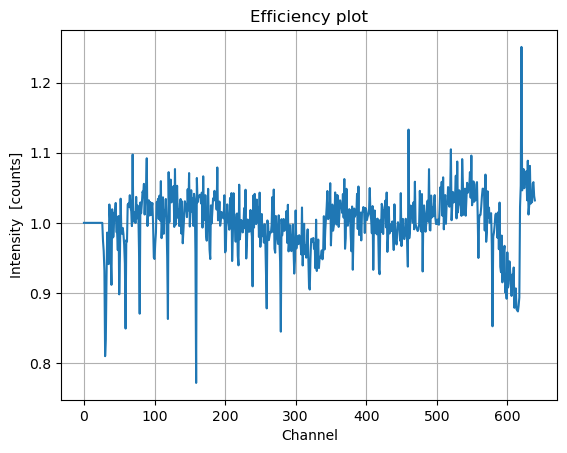

In [4]:
efficiency = read_dat_file('efficiency',3)[1]
err_efficiency = read_dat_file('efficiency',3)[2]
plt.plot(channels,efficiency, '-')
plt.xlabel('Channel')
plt.ylabel('Intensity  [counts]')
plt.title('Efficiency plot')
plt.grid()
plt.show()

# NICKEL POWDER 

Use Ni reflections to find lambda and angular step

bs44380	M=200000   
bs44381	M=200000 con detector ruotato di 0.05°  
bs44382	M=200000 con detector ruotato di 0.10°  
bs44383	M=200000 con detector ruotato di 0.14° 


########## Rifare analisi considerando rotazione di 1/4 step per volta #########

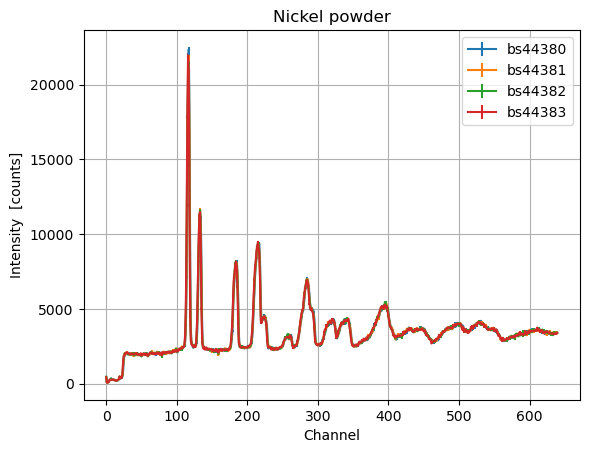

In [5]:
nickel, err_nickel = plot_raw_data('44380',4, 'Nickel powder')



Background subtraction

Fit parameters
Intercept 1900.0 +/- 10.0 counts
Slope 2.06 +/- 0.06 counts/channels


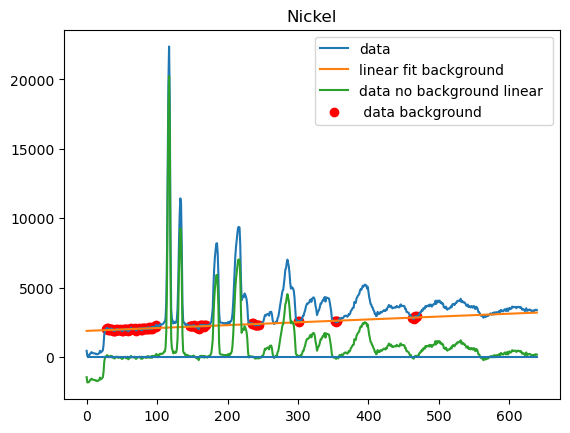

Fit parameters
Intercept 1900.0 +/- 10.0 counts
Slope 2.02 +/- 0.06 counts/channels


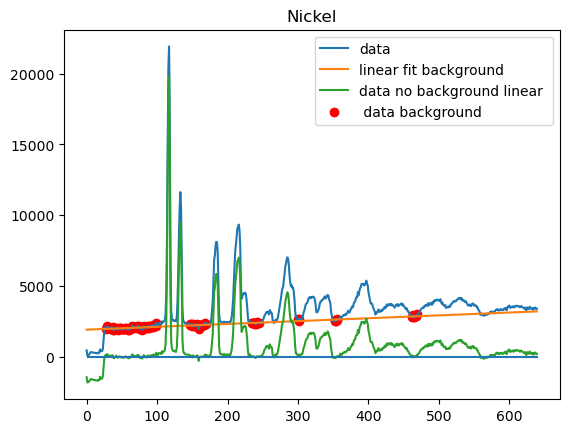

Fit parameters
Intercept 1900.0 +/- 10.0 counts
Slope 2.03 +/- 0.06 counts/channels


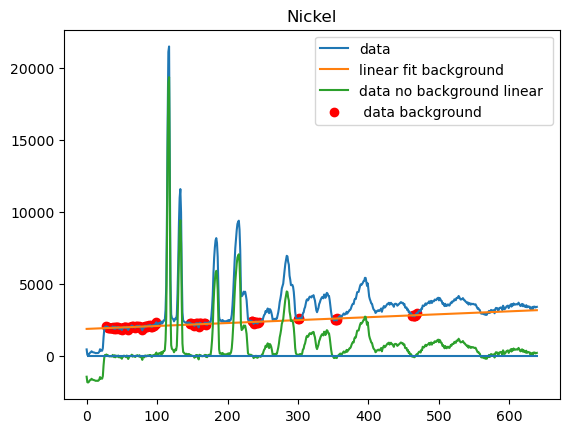

Fit parameters
Intercept 1900.0 +/- 10.0 counts
Slope 2.07 +/- 0.06 counts/channels


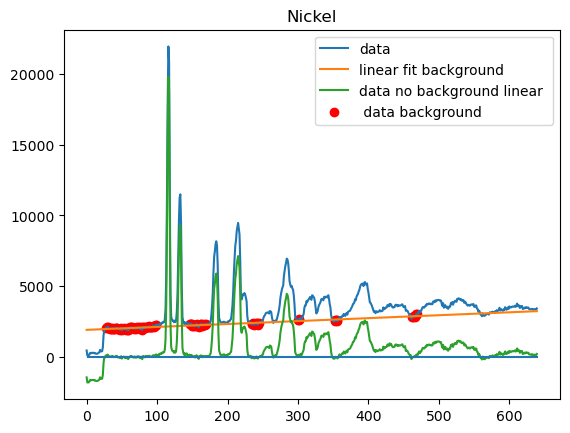

In [6]:
#background subtraction

#%matplotlib ipympl

def lin_fit(x,a,b):
    return a*x + b

for i in range(4):

    indici = get_indices_in_range(channels,0,27)
    x_data_fondo = remove_indexes(list(channels),indici)
    y_data_fondo = remove_indexes(list(nickel[i]),indici)

    indici = get_indices_in_range(x_data_fondo,100,145)
    x_data_fondo = remove_indexes(list(x_data_fondo),indici)
    y_data_fondo = remove_indexes(list(y_data_fondo),indici)

    indici = get_indices_in_range(x_data_fondo,170,233)
    x_data_fondo = remove_indexes(list(x_data_fondo),indici)
    y_data_fondo = remove_indexes(list(y_data_fondo),indici)

    indici = get_indices_in_range(x_data_fondo,245,299)
    x_data_fondo = remove_indexes(list(x_data_fondo),indici)
    y_data_fondo = remove_indexes(list(y_data_fondo),indici)

    indici = get_indices_in_range(x_data_fondo,303,351)
    x_data_fondo = remove_indexes(list(x_data_fondo),indici)
    y_data_fondo = remove_indexes(list(y_data_fondo),indici)

    indici = get_indices_in_range(x_data_fondo,357,461)
    x_data_fondo = remove_indexes(list(x_data_fondo),indici)
    y_data_fondo = remove_indexes(list(y_data_fondo),indici)

    indici = get_indices_in_range(x_data_fondo,470,639)
    x_data_fondo = remove_indexes(list(x_data_fondo),indici)
    y_data_fondo = remove_indexes(list(y_data_fondo),indici)

    '''plt.plot(channels,nickel[0],label="data")    
    plt.scatter(x_data_fondo,y_data_fondo,label="background",color="red")   
    plt.title("Nickel background")
    plt.legend()
    plt.show() '''
    popt,pcov = curve_fit(lin_fit,x_data_fondo,y_data_fondo,sigma = np.sqrt(y_data_fondo))
    par = my_round(popt,np.sqrt(np.diag(pcov)))
    print('Fit parameters')
    print('Intercept',par[1][0], '+/-', par[1][1],'counts')
    print('Slope',par[0][0], '+/-', par[0][1],'counts/channels')

    plt.plot(channels,nickel[i],label="data")
    plt.plot(channels,lin_fit(channels,*popt),label="linear fit background")
    plt.plot(channels,nickel[i]-lin_fit(channels,*popt),label="data no background linear ")
    plt.scatter(x_data_fondo,y_data_fondo,label=" data background",color="red")  
    plt.hlines(0,0,640)
    plt.title("Nickel")
    plt.legend()
    plt.show()

    nickel[i] = nickel[i] - lin_fit(channels, *popt)
    err_nickel[i] = np.sqrt(err_nickel[i]**2 + pcov[0][0] + pcov[1][1])

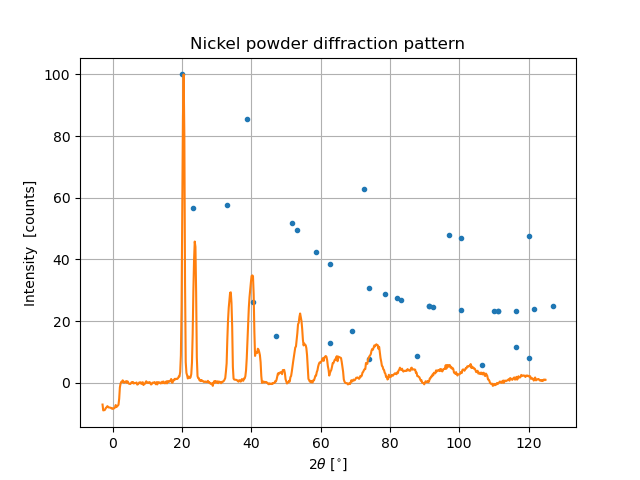

In [7]:
#Compare with diffraction pattern from VESTA
%matplotlib ipympl
twotheta = read_dat_file('nickel_vesta',1)[7]
intensity = read_dat_file('nickel_vesta',1)[8]

plt.plot(twotheta,intensity,'.')
plt.plot(angle-2.9,nickel[0]*100/max(nickel[0]))
plt.xlabel(r'$2 \theta$ [$^{\circ}$]')
plt.ylabel('Intensity  [counts]')
plt.title('Nickel powder diffraction pattern')
plt.grid()
plt.show()

Find p0 to fit well peaks with double gaussian

Peak position 213.85 +/- 0.1 channel
Peak height 7300.0 +/- 300.0 counts
Peak width 3.78 +/- 0.1 channel
Peak position 224.6 +/- 0.3 channel
Peak height 2200.0 +/- 200.0 counts
Peak width 2.1 +/- 0.3 channel


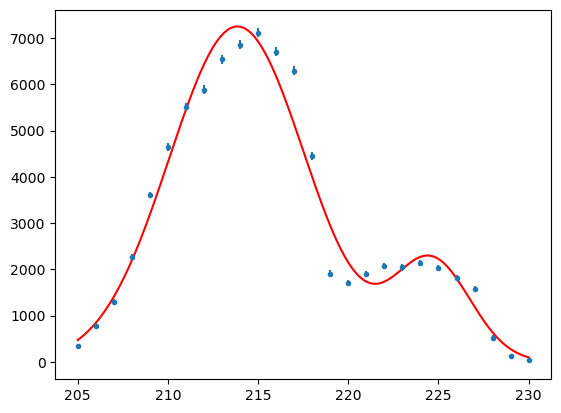

In [25]:
index = get_indices_in_range(channels, 205, 230)
x = channels[index]
data = nickel[3][index]
err_data = err_nickel[0][index]
x_plot = np.linspace(min(x), max(x),10000)

p0 = [7000,215, 7,2000,223,5]
popt, pcov = curve_fit(gaussian_double,x, data,sigma=err_data,p0=p0,maxfev = 80000)

par = my_round(popt,np.sqrt(np.diag(pcov)))
print('Peak position',par[1][0], '+/-', par[1][1],'channel')
print('Peak height',par[0][0], '+/-', par[0][1],'counts')
print('Peak width',par[2][0], '+/-', par[2][1],'channel')
print('Peak position',par[4][0], '+/-', par[4][1],'channel')
print('Peak height',par[3][0], '+/-', par[3][1],'counts')
print('Peak width',par[5][0], '+/-', par[5][1],'channel')


plt.plot(x_plot, gaussian_double(x_plot, *popt),color='red')

plt.errorbar(x,data, yerr=err_data, fmt = '.')
plt.show()

Peak position 255.9 +/- 0.5 channel
Peak height 700.0 +/- 40.0 counts
Peak width -3.3 +/- 0.5 channel
Peak position 261.7 +/- 0.2 channel
Peak height 700.0 +/- 100.0 counts
Peak width 1.6 +/- 0.2 channel


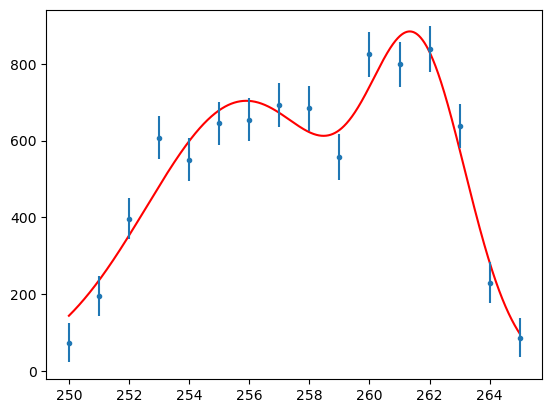

In [26]:
index = get_indices_in_range(channels, 250, 265)
x = channels[index]
data = nickel[0][index]
err_data = err_nickel[0][index]
x_plot = np.linspace(min(x), max(x),10000)


p0 = [700,255, 6,800,262,4]
popt, pcov = curve_fit(gaussian_double,x, data,sigma=err_data,p0 = p0, maxfev = 80000)


par = my_round(popt,np.sqrt(np.diag(pcov)))
print('Peak position',par[1][0], '+/-', par[1][1],'channel')
print('Peak height',par[0][0], '+/-', par[0][1],'counts')
print('Peak width',par[2][0], '+/-', par[2][1],'channel')
print('Peak position',par[4][0], '+/-', par[4][1],'channel')
print('Peak height',par[3][0], '+/-', par[3][1],'counts')
print('Peak width',par[5][0], '+/-', par[5][1],'channel')

plt.plot(x_plot, gaussian_double(x_plot, *popt),color='red')
plt.errorbar(x,data, yerr=err_data, fmt = '.')
plt.show()

Peak position 284.63 +/- 0.1 channel
Peak height 4420.0 +/- 80.0 counts
Peak width 4.7 +/- 0.2 channel
Peak position 293.7 +/- 0.2 channel
Peak height 1700.0 +/- 100.0 counts
Peak width 2.0 +/- 0.3 channel


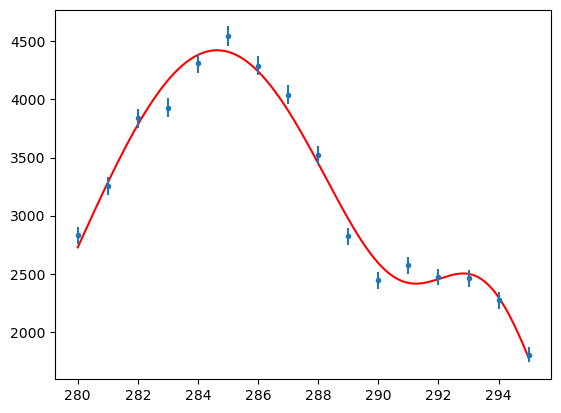

In [27]:
index = get_indices_in_range(channels, 280, 295)
x = channels[index]
data = nickel[0][index]
err_data = err_nickel[0][index]
x_plot = np.linspace(min(x), max(x),10000)


p0 = [4500,285, 5,2500,292,2]
popt, pcov = curve_fit(gaussian_double,x, data,sigma=err_data,p0 = p0, maxfev = 80000)


par = my_round(popt,np.sqrt(np.diag(pcov)))
print('Peak position',par[1][0], '+/-', par[1][1],'channel')
print('Peak height',par[0][0], '+/-', par[0][1],'counts')
print('Peak width',par[2][0], '+/-', par[2][1],'channel')
print('Peak position',par[4][0], '+/-', par[4][1],'channel')
print('Peak height',par[3][0], '+/-', par[3][1],'counts')
print('Peak width',par[5][0], '+/-', par[5][1],'channel')

plt.plot(x_plot, gaussian_double(x_plot, *popt),color='red')
plt.errorbar(x,data, yerr=err_data, fmt = '.')
plt.show()

Peak position 495.1 +/- 0.6 channel
Peak height 1030.0 +/- 30.0 counts
Peak width 14.4 +/- 0.7 channel
Peak position 530.9 +/- 0.4 channel
Peak height 1070.0 +/- 30.0 counts
Peak width 8.9 +/- 0.6 channel


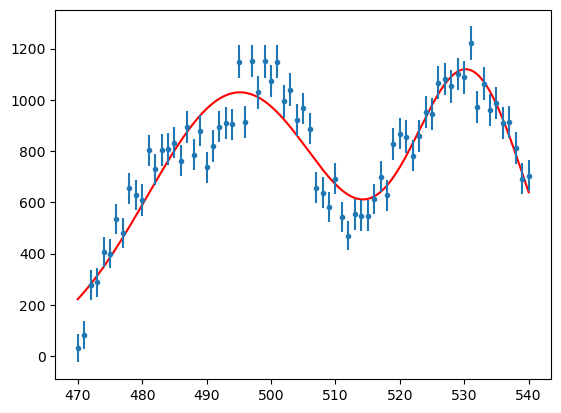

In [28]:
index = get_indices_in_range(channels, 470, 540)
x = channels[index]
data = nickel[0][index]
err_data = err_nickel[0][index]
x_plot = np.linspace(min(x), max(x),10000)


p0 = [1100,500, 5,1100,530,5]
popt, pcov = curve_fit(gaussian_double,x, data,sigma=err_data,p0 = p0, maxfev = 80000)


par = my_round(popt,np.sqrt(np.diag(pcov)))
print('Peak position',par[1][0], '+/-', par[1][1],'channel')
print('Peak height',par[0][0], '+/-', par[0][1],'counts')
print('Peak width',par[2][0], '+/-', par[2][1],'channel')
print('Peak position',par[4][0], '+/-', par[4][1],'channel')
print('Peak height',par[3][0], '+/-', par[3][1],'counts')
print('Peak width',par[5][0], '+/-', par[5][1],'channel')

plt.plot(x_plot, gaussian_double(x_plot, *popt),color='red')


plt.errorbar(x,data, yerr=err_data, fmt = '.')
plt.show()

Peak position 433.0 +/- 1.0 channel
Peak height 820.0 +/- 20.0 counts
Peak width 14.9 +/- 1.0 channel
Peak position 448.8 +/- 0.4 channel
Peak height 430.0 +/- 70.0 counts
Peak width 4.4 +/- 0.8 channel


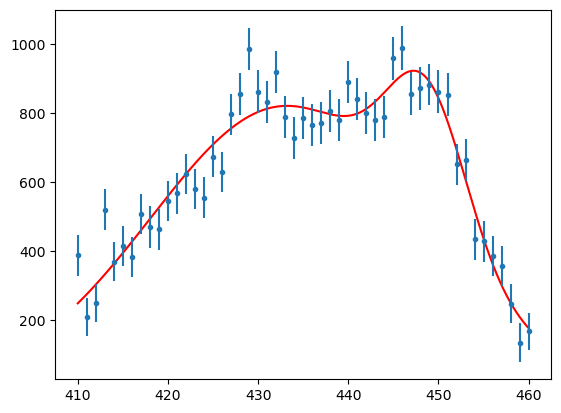

In [29]:
index = get_indices_in_range(channels, 410, 460)
x = channels[index]
data = nickel[0][index]
err_data = err_nickel[0][index]
x_plot = np.linspace(min(x), max(x),10000)


p0 = [900,430, 10,900,450,10]
popt, pcov = curve_fit(gaussian_double,x, data,sigma=err_data,p0 = p0, maxfev = 80000)


par = my_round(popt,np.sqrt(np.diag(pcov)))
print('Peak position',par[1][0], '+/-', par[1][1],'channel')
print('Peak height',par[0][0], '+/-', par[0][1],'counts')
print('Peak width',par[2][0], '+/-', par[2][1],'channel')
print('Peak position',par[4][0], '+/-', par[4][1],'channel')
print('Peak height',par[3][0], '+/-', par[3][1],'counts')
print('Peak width',par[5][0], '+/-', par[5][1],'channel')

plt.plot(x_plot, gaussian_double(x_plot, *popt),color='red')


plt.errorbar(x,data, yerr=err_data, fmt = '.')
plt.show()

Find peak positions and fit them with (double) gaussian. Diffivcult to do it in a general way, need to customize for each peak, escpecially for double gaussians

############  bs44380#############
[ 3.78237129  4.70702788  4.48880627 11.44467338 13.00773747 20.98422827
  8.2704829   3.96671209 12.4725123  25.5927447   0.          0.        ]


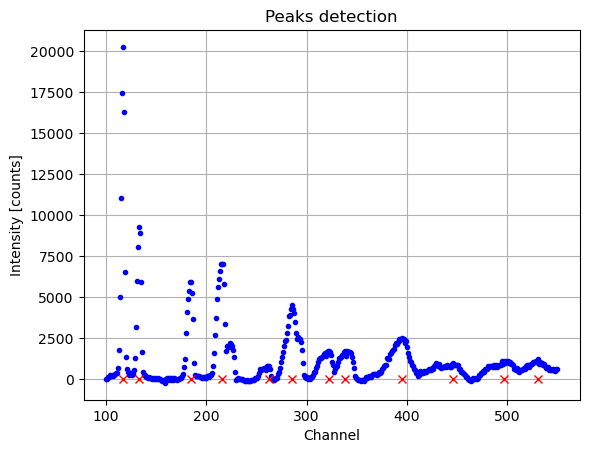

[(113.21762871289549, 120.78237128710451), (128.29297212056878, 137.70702787943122), (180.51119372604018, 189.48880627395982), (204.55532661583499, 227.44467338416501), (248.99226253261497, 275.007737467385), (264.015771730791, 305.984228269209), (313.7295171007944, 330.2704828992056), (334.0332879147403, 341.9667120852597), (382.5274876959823, 407.4725123040177), (420.4072552954113, 471.5927447045887), (497.0, 497.0)]
[[1349.925543165743, 114.0, 0], [40470.90975857813, 120.0, 12.0]]
Peak 0 fit parameters
Peak position 116.7 +/- 0.07 channel
Peak height 21000.0 +/- 1000.0 counts
Peak width 1.52 +/- 0.07 channel
[[428.9588743057611, 129.0, 0], [18526.584046124295, 137.0, 16.0]]
Peak 1 fit parameters
Peak position 132.86 +/- 0.1 channel
Peak height 9800.0 +/- 600.0 counts
Peak width 1.84 +/- 0.09 channel
[[266.84215398527704, 181.0, 0], [11859.472954104958, 189.0, 16.0]]
Peak 2 fit parameters
Peak position 183.8 +/- 0.2 channel
Peak height 6400.0 +/- 500.0 counts
Peak width 2.5 +/- 0.2 c

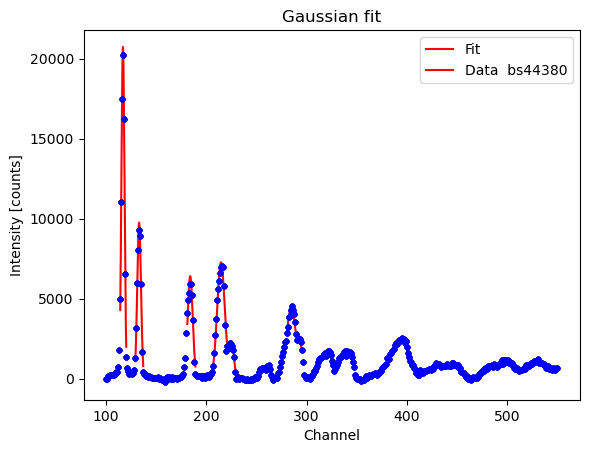

############  bs44381#############
[ 3.89258946  4.55022852  4.83454578 11.54095065 13.30166667 20.73868595
  9.51787332 10.00975302 11.54709577 29.24131284  0.          0.        ]


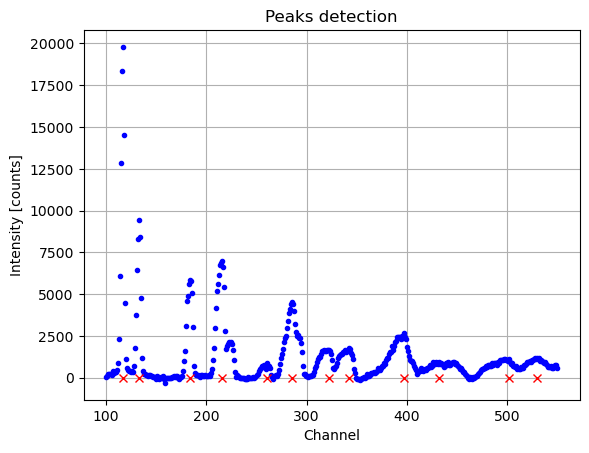

[(113.1074105443434, 120.8925894556566), (128.44977147886448, 137.55022852113552), (179.16545421745312, 188.83454578254688), (204.45904934640896, 227.54095065359104), (246.6983333253575, 273.3016666746425), (264.26131405286196, 305.73868594713804), (312.48212668073626, 331.51787331926374), (331.9902469788501, 352.0097530211499), (385.4529042342555, 408.5470957657445), (402.7586871638105, 461.2413128361895), (502.0, 502.0)]
[[1095.9131245930976, 114.0, 0], [39580.32888725227, 120.0, 12.0]]
Peak 0 fit parameters
Peak position 116.48 +/- 0.08 channel
Peak height 21000.0 +/- 1000.0 counts
Peak width 1.52 +/- 0.07 channel
[[415.7227879527536, 129.0, 0], [18919.90330429528, 137.0, 16.0]]
Peak 1 fit parameters
Peak position 132.63 +/- 0.1 channel
Peak height 9700.0 +/- 600.0 counts
Peak width 1.86 +/- 0.09 channel
[[710.2350213747354, 180.0, 0], [11687.983234785457, 188.0, 16.0]]
Peak 2 fit parameters
Peak position 183.5 +/- 0.2 channel
Peak height 6200.0 +/- 500.0 counts
Peak width 2.7 +/- 0

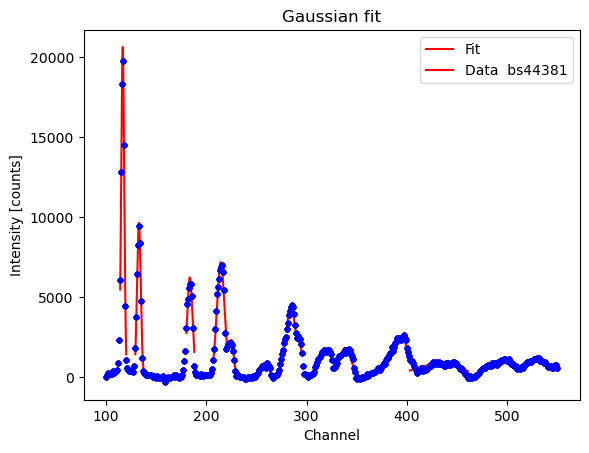

############  bs44382#############
[ 3.9448167   4.55214348  4.60585711 11.50137203 12.7080306  21.22676703
  7.91985172  8.33549834  9.92359108 15.37223096  0.          0.        ]


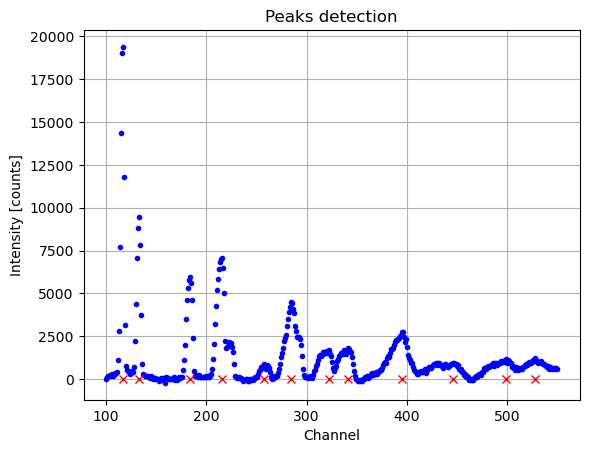

[(113.05518330392745, 120.94481669607255), (128.4478565228399, 137.5521434771601), (179.3941428884151, 188.6058571115849), (204.49862796758273, 227.50137203241727), (244.2919693985811, 269.7080306014189), (262.77323296687996, 305.22676703312004), (314.08014827590426, 329.91985172409574), (332.6645016588144, 349.3354983411856), (385.07640891703926, 404.92359108296074), (430.6277690408539, 461.3722309591461), (499.0, 499.0)]
[[764.1560651871223, 114.0, 0], [38765.20922721452, 120.0, 12.0]]
Peak 0 fit parameters
Peak position 116.24 +/- 0.08 channel
Peak height 21000.0 +/- 1000.0 counts
Peak width 1.52 +/- 0.07 channel
[[287.05283458249187, 129.0, 0], [18886.12489249139, 137.0, 16.0]]
Peak 1 fit parameters
Peak position 132.4 +/- 0.09 channel
Peak height 9800.0 +/- 500.0 counts
Peak width 1.85 +/- 0.09 channel
[[480.81306995706154, 180.0, 0], [11864.966516112529, 188.0, 16.0]]
Peak 2 fit parameters
Peak position 183.2 +/- 0.2 channel
Peak height 6300.0 +/- 500.0 counts
Peak width 2.7 +/- 

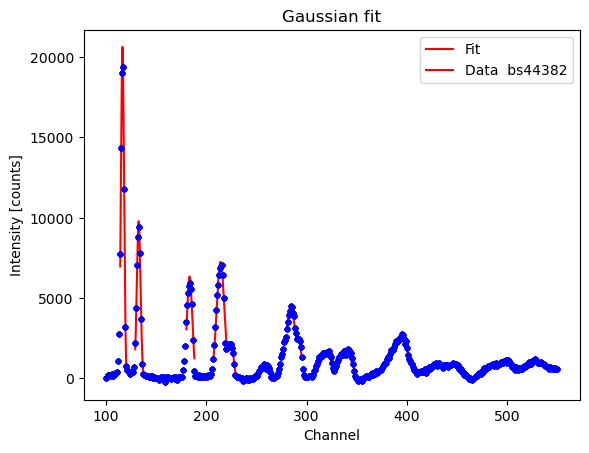

############  bs44383#############
[ 3.84921926  4.59269461  4.7010026  11.18873333 13.36294253 20.79119998
  9.46106321  7.61813685 12.08642087  8.49025291  0.          0.        ]


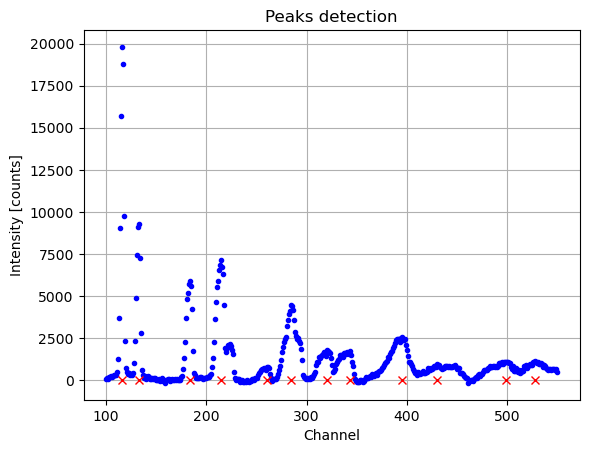

[(112.15078074471126, 119.84921925528874), (128.40730538703073, 137.59269461296927), (179.298997403465, 188.701002596535), (203.8112666694633, 226.1887333305367), (246.63705747227607, 273.36294252772393), (263.2088000213605, 304.7911999786395), (310.53893679439176, 329.46106320560824), (335.3818631496779, 350.6181368503221), (382.9135791339036, 407.0864208660964), (421.5097470927259, 438.4902529072741), (499.0, 499.0)]
[[2346.3993389199413, 113.0, 0], [39611.54369055793, 119.0, 12.0]]
Peak 0 fit parameters
Peak position 116.03 +/- 0.08 channel
Peak height 21000.0 +/- 1000.0 counts
Peak width 1.55 +/- 0.07 channel
[[320.4140146447512, 129.0, 0], [18621.907170958093, 137.0, 16.0]]
Peak 1 fit parameters
Peak position 132.22 +/- 0.09 channel
Peak height 9800.0 +/- 500.0 counts
Peak width 1.82 +/- 0.08 channel
[[436.3834768496413, 180.0, 0], [11771.385930803395, 188.0, 16.0]]
Peak 2 fit parameters
Peak position 183.1 +/- 0.2 channel
Peak height 6300.0 +/- 500.0 counts
Peak width 2.6 +/- 0.2

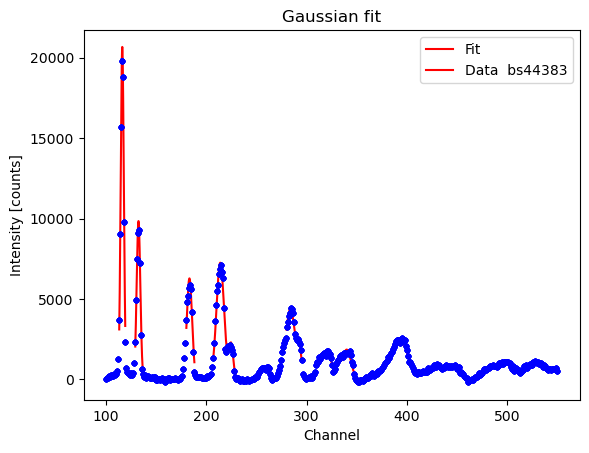

In [30]:
#Find peaks position
#%matplotlib ipympl
n_nickel = 4
nickel_peaks_tot = []
err_nickel_peaks_tot = []  
height_nickel_peaks_tot = []
err_height_nickel_peaks_tot = []
width_nickel_peaks_tot = []
err_width_nickel_peaks_tot = []

for k in range(n_nickel):
    filename = 44380 + k
    filename = str(filename)
    print('############  bs'+filename+ '#############')

    index = get_indices_in_range(channels,100,550)
    shift = channels[index]
    intensity = nickel[k][index]
    err_intensity = err_nickel[k][index]
    
    index_peaks = sci.signal.find_peaks(intensity,height=500,prominence=500,distance=1)[0]
    widths = np.zeros(len(index_peaks))
    widths[0]  = sci.signal.peak_widths(intensity,index_peaks, rel_height=0.5)[0][0]                #primi due picchi molto più prominenti: ho bisogno di più larghezza per fittarli meglio
    widths[1]  = sci.signal.peak_widths(intensity,index_peaks, rel_height=0.5)[0][1]
    widths[2]=sci.signal.peak_widths(intensity,index_peaks, rel_height=0.2)[0][2]
    widths[9]=sci.signal.peak_widths(intensity,index_peaks, rel_height=0.4)[0][9]
    for i in range(3,6):
        widths[i]=sci.signal.peak_widths(intensity,index_peaks, rel_height=0.7)[0][i]        # prendo più larghezza perchè voglio la doppia gaussiana
        widths[i+3]=sci.signal.peak_widths(intensity,index_peaks, rel_height=0.2)[0][i+3]

    print(widths)
    shift_peak= []
    intensity_peaks = []

    i=0
    while(i<index_peaks.size):
        shift_peak.append(shift[index_peaks[i]])
        intensity_peaks.append(intensity[index_peaks[i]])
        i=i+1
    
    larghezza_in_shift = widths*2
    #print(shift_peak,larghezza_in_shift)


    shift_peak = np.array(shift_peak) 

    plt.plot(shift,intensity,'.',color='blue')
    plt.plot(shift_peak,[0]*len(shift_peak),'x',color='red')
    plt.title('Peaks detection')
    plt.xlabel('Channel')
    plt.ylabel('Intensity [counts]')
    plt.grid()
    plt.show()


    ranges = []
    for j in range(len(shift_peak)-1):
        shift_sup = shift_peak[j]+larghezza_in_shift[j]/2
        shift_inf = shift_peak[j]-larghezza_in_shift[j]/2
        coord = (shift_inf,shift_sup)
        ranges.append(coord)
    print(ranges)
    nickel_peaks = []
    err_nickel_peaks = []  
    height_nickel_peaks = []
    err_height_nickel_peaks = []
    width_nickel_peaks = []
    err_width_nickel_peaks = []

    i = 0
    for start, end in ranges:

        x_indices = get_indices_in_range(shift, start, end)
        first_peak_x = shift[x_indices]
        first_peak_y = intensity[x_indices]
        sigma =err_intensity[x_indices]
        x_plot = np.linspace(min(first_peak_x), max(first_peak_x),10000)

        if (i < 6 and i > 2) or i == 10:
            if i == 3:
                x_indices = get_indices_in_range(shift, 207, 230)
                first_peak_x = shift[x_indices]
                first_peak_y = intensity[x_indices]
                sigma =err_intensity[x_indices]
                x_plot = np.linspace(min(first_peak_x), max(first_peak_x),10000)
                
                p0 = [7000,215, 7,2000,223,5]

            if i == 4:
                x_indices = get_indices_in_range(shift, 250, 265)
                first_peak_x = shift[x_indices]
                first_peak_y = intensity[x_indices]
                sigma =err_intensity[x_indices]
                x_plot = np.linspace(min(first_peak_x), max(first_peak_x),10000)
                p0 = [700,255, 6,800,262,4]

            if i == 5:
                x_indices = get_indices_in_range(shift, 280, 295)
                first_peak_x = shift[x_indices]
                first_peak_y = intensity[x_indices]
                sigma =err_intensity[x_indices]
                x_plot = np.linspace(min(first_peak_x), max(first_peak_x),10000)
                p0 = [4500,285, 5,2500,292,2]
            
            if i == 10:
                x_indices = get_indices_in_range(shift, 470, 540)
                first_peak_x = shift[x_indices]
                first_peak_y = intensity[x_indices]
                sigma =err_intensity[x_indices]
                x_plot = np.linspace(min(first_peak_x), max(first_peak_x),10000)
                p0 = [1100,500, 5,1100,530,5]
                    
            popt, pcov = curve_fit(gaussian_double,first_peak_x, first_peak_y,sigma=sigma,p0=p0,maxfev=80000)

            print('Peak %d fit parameters' %i)
            par = my_round(popt,np.sqrt(np.diag(pcov)))
            print('Peak position',par[1][0], '+/-', par[1][1],'channel')
            print('Peak height',par[0][0], '+/-', par[0][1],'counts')
            print('Peak width',par[2][0], '+/-', par[2][1],'channel')
            print('Peak position',par[4][0], '+/-', par[4][1],'channel')
            print('Peak height',par[3][0], '+/-', par[3][1],'counts')
            print('Peak width',par[5][0], '+/-', par[5][1],'channel')

            nickel_peaks.append(popt[1])
            height_nickel_peaks.append(popt[0])
            width_nickel_peaks.append(np.abs(popt[2]))
            nickel_peaks.append(popt[4])
            height_nickel_peaks.append(popt[3])
            width_nickel_peaks.append(popt[5])

            err_nickel_peaks.append(np.sqrt(pcov[1][1]) )
            err_height_nickel_peaks.append(np.sqrt(pcov[0][0]))
            err_width_nickel_peaks.append(np.sqrt(pcov[2][2]))
            err_nickel_peaks.append(np.sqrt(pcov[4][4]) )
            err_height_nickel_peaks.append(np.sqrt(pcov[3][3]))
            err_width_nickel_peaks.append(np.sqrt(pcov[5][5]))
            
            plt.plot(x_plot, gaussian_double(x_plot, *popt),color='red')
        else:
            p0 = [max(first_peak_y), np.mean(first_peak_x), 1]
            bounds=[[min(first_peak_y),min(first_peak_x),0],[2*max(first_peak_y),max(first_peak_x),2*abs(max(first_peak_x)-min(first_peak_x))]]
            print(bounds)
            popt, pcov = curve_fit(gaussian,first_peak_x, first_peak_y,sigma=sigma,p0=p0,bounds = bounds,maxfev=80000)

            print('Peak %d fit parameters' %i)
            par = my_round(popt,np.sqrt(np.diag(pcov)))
            print('Peak position',par[1][0], '+/-', par[1][1],'channel')
            print('Peak height',par[0][0], '+/-', par[0][1],'counts')
            print('Peak width',par[2][0], '+/-', par[2][1],'channel')

            nickel_peaks.append(popt[1])
            height_nickel_peaks.append(popt[0])
            width_nickel_peaks.append(popt[2])

            err_nickel_peaks.append(np.sqrt(pcov[1][1]) )
            err_height_nickel_peaks.append(np.sqrt(pcov[0][0]))
            err_width_nickel_peaks.append(np.sqrt(pcov[2][2]))
            
            plt.plot(x_plot, gaussian(x_plot, *popt),color='red')
        plt.errorbar(shift,intensity,yerr=err_intensity,fmt='.',color='blue')
        i +=1
    plt.title('Gaussian fit')
    plt.legend(['Fit', 'Data  bs'+filename])
    plt.xlabel('Channel')
    plt.ylabel('Intensity [counts]')
    plt.show()

    nickel_peaks_tot.append(nickel_peaks)
    err_nickel_peaks_tot.append(err_nickel_peaks) 
    height_nickel_peaks_tot.append(height_nickel_peaks)
    err_height_nickel_peaks_tot.append(err_height_nickel_peaks)
    width_nickel_peaks_tot.append(width_nickel_peaks)
    err_width_nickel_peaks_tot.append(err_width_nickel_peaks)

Index peaks and average fit values between repetitions

In [31]:
#Fit peaks position to Bragg law

# lattice parameters
a = 3.615 # Angstrom

# allowed reflections
h = np.array([1,2,2,3,2,4,3,4,4,5,5,6,6,7])
k = np.array([1,0,2,1,2,0,3,2,2,1,3,2,4,3])
l = np.array([1,0,0,1,2,0,1,0,2,1,1,2,2,1])

d_inv = np.sqrt((h**2+k**2+l**2)/a**2)
x = np.arcsin(0.729*d_inv/2)

# Average peak postions
#print(nickel_peaks_tot)
nickel_peaks = np.mean(nickel_peaks_tot,axis=0)
err_nickel_peaks = np.sqrt(np.sum(np.array(err_nickel_peaks_tot)**2,axis=0)+np.std(nickel_peaks_tot)/n_nickel)/n_nickel

height_nickel_peaks = np.mean(height_nickel_peaks_tot,axis=0)
err_height_nickel_peaks = np.sqrt(np.sum(np.array(err_height_nickel_peaks_tot)**2,axis=0)+np.std(height_nickel_peaks_tot)/n_nickel)/n_nickel

width_nickel_peaks = np.mean(width_nickel_peaks_tot,axis=0)
err_width_nickel_peaks = np.sqrt(np.sum(np.array(err_width_nickel_peaks_tot)**2,axis=0)+np.std(width_nickel_peaks_tot)/n_nickel)/n_nickel



Fit to bragg law, both with three free parameters ($\lambda, \theta_0$ and $\Delta \theta$) and two free parameters, fix $\Delta \theta = 0.2^{\circ}$

 #### Fit to Bragg law ####
lambda 0.6079701801358982 +/- 0.06929487642674455 Angstrom
theta0 -1.4896902673401402 +/- 1.1459155902616465 deg
delta_theta 0.1604281826366305 +/- 0.022918311805232933 deg
Chi squared/ dof 13.320919810459573


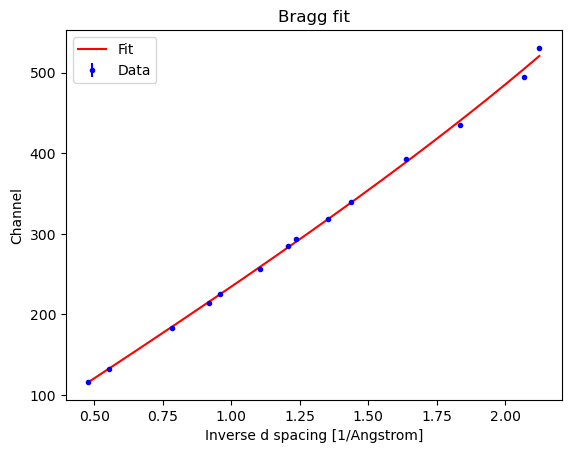

In [32]:
#fit to bragg law

def bragg(d_inv, lmbd,theta0, d_theta):
    pippo = np.arcsin(lmbd*d_inv/2)
    return (pippo-theta0)/d_theta

nickel_peaks_new = np.array(remove_indexes(nickel_peaks,[6]))
err_nickel_peaks_new = np.array(remove_indexes(err_nickel_peaks,[6]))
width_nickel_peaks_new = np.array(remove_indexes(width_nickel_peaks, [6]))

p0 = [0.72,-3*np.pi/360,0.2*np.pi/360]
bounds = ([0.1,-np.inf,0.1*np.pi/360],[1,np.inf,0.9*np.pi/360])

popt, pcov = curve_fit(bragg, d_inv, nickel_peaks_new[:], sigma = err_nickel_peaks_new[:],bounds = bounds, maxfev=800000) 


chi_sq = sum((bragg(d_inv,*popt)-nickel_peaks_new[:])**2/err_nickel_peaks_new[:]**2)/(np.size(nickel_peaks_new[:])-3)

print(' #### Fit to Bragg law ####')
par = my_round(popt,np.sqrt(np.diag(pcov)))

print('lambda',popt[0], '+/-', np.sqrt(pcov[0][0]),'Angstrom')
print('theta0',par[1][0]*360/np.pi, '+/-', par[1][1]*360/np.pi,'deg')
print('delta_theta',par[2][0]*360/np.pi, '+/-', par[2][1]*360/np.pi,'deg')

print('Chi squared/ dof',chi_sq)

x_plot = np.linspace(min(d_inv), max(d_inv),10000)
plt.plot(x_plot, bragg(x_plot, *popt),color='red')
plt.errorbar(d_inv,nickel_peaks_new[:], yerr=err_nickel_peaks_new[:],fmt='.',color='blue')
plt.title('Bragg fit')
plt.legend(['Fit', 'Data'])
plt.ylabel('Channel')
plt.xlabel('Inverse d spacing [1/Angstrom]')
plt.show()


 #### Fit to Bragg law ####
lambda 0.725610141519427 +/- 0.006275331605890349 Angstrom
theta0 -4.125296124941927 +/- 0.6875493541569879 deg
Chi squared/ dof 17.229859609553337


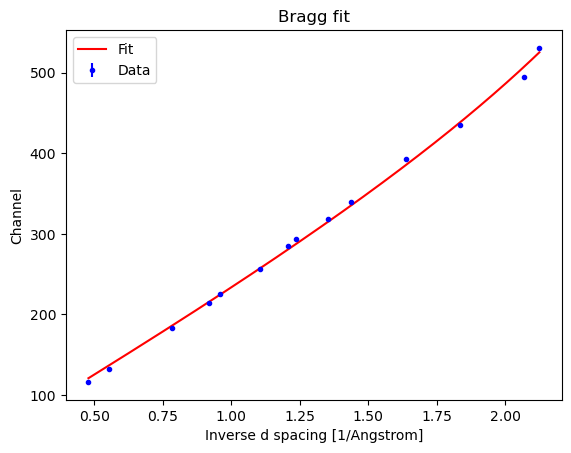

In [33]:
#Fix delta theta = 0.2 deg

def bragg_fix(d_inv,lmbd,theta0):
    pippo = np.arcsin(lmbd*d_inv/2)
    return (pippo-theta0)/(0.2*np.pi/360)

p0 = [0.72,-3*np.pi/360]
bounds = ([0.1,-np.inf],[1,np.inf])
popt, pcov = curve_fit(bragg_fix, d_inv, nickel_peaks_new[:], sigma = err_nickel_peaks_new[:],bounds = bounds, maxfev=800000) 


chi_sq = sum((bragg_fix(d_inv,*popt)-nickel_peaks_new[:])**2/err_nickel_peaks_new[:]**2)/(np.size(nickel_peaks_new[:])-2)

print(' #### Fit to Bragg law ####')
par = my_round(popt,np.sqrt(np.diag(pcov)))

print('lambda',popt[0], '+/-', np.sqrt(pcov[0][0]),'Angstrom')
print('theta0',par[1][0]*360/np.pi, '+/-', par[1][1]*360/np.pi,'deg')

print('Chi squared/ dof',chi_sq)

x_plot = np.linspace(min(d_inv), max(d_inv),10000)
plt.plot(x_plot, bragg_fix(x_plot, *popt),color='red')
plt.errorbar(d_inv,nickel_peaks_new[:], yerr=err_nickel_peaks_new[:],fmt='.',color='blue')
plt.title('Bragg fit')
plt.legend(['Fit', 'Data'])
plt.ylabel('Channel')
plt.xlabel('Inverse d spacing [1/Angstrom]')
plt.show()


 #### Fit to Bragg law ####
Slope 571.0 +/- 7.0 channel
Intercept 20.0 +/- 4.0 channel
#####
dtheta 0.20076848052866972 +/- 0.012660871988710505 deg
theta0 -4.076892489612403 +/- 0.7732047551695678 deg
Chi squared/ dof 17.52119351339979


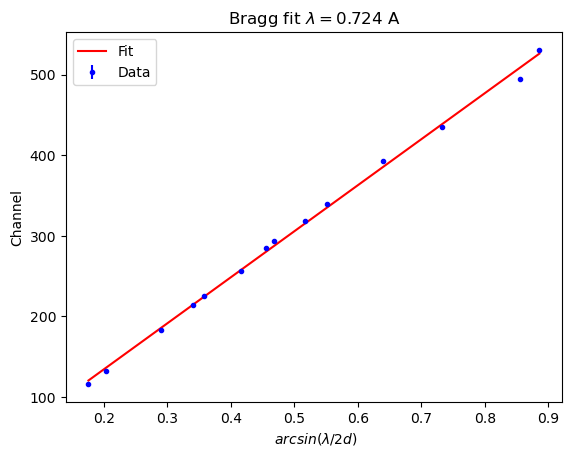

In [34]:
#linear fit to arcsin (fix lambda)


bounds = [[-np.inf,-np.inf],[np.inf,np.inf]]
popt, pcov = curve_fit(lin_fit, x, nickel_peaks_new[:], sigma =err_nickel_peaks_new[:],bounds = bounds, maxfev = 80000)

chi_sq = sum((lin_fit(x,*popt)-nickel_peaks_new[:])**2/err_nickel_peaks_new[:]**2)/(np.size(nickel_peaks_new[:])-2)

print(' #### Fit to Bragg law ####')
par = my_round(popt,np.sqrt(np.diag(pcov)))
print('Slope',par[0][0], '+/-', par[0][1],'channel')
print('Intercept',par[1][0], '+/-', par[1][1],'channel')
print('#####')

d_theta = 1/popt[0]*360/np.pi
err_d_theta = np.sqrt(pcov[0][0])/popt[0]

theta0 = -360/np.pi*popt[1]/popt[0]
err_theta0= abs(theta0)*np.sqrt(pcov[1][1]/popt[1]**2+pcov[0][0]/popt[0]**2)

print('dtheta',d_theta, '+/-', err_d_theta,'deg')
print('theta0',theta0, '+/-', err_theta0,'deg')
print('Chi squared/ dof',chi_sq)

x_plot = np.linspace(min(x), max(x),10000)
plt.plot(x_plot, lin_fit(x_plot, *popt),color='red')
plt.errorbar(x,nickel_peaks_new[:], yerr=err_nickel_peaks_new[:],fmt='.',color='blue')
plt.title(r'Bragg fit $\lambda = 0.724$ A')
plt.legend(['Fit', 'Data'])
plt.ylabel('Channel')
plt.xlabel(r' $arcsin(\lambda/2 d)$')
plt.show()


# Test of empty cell

- T = 300 K --> bs44189 - bs44198 $\qquad$ 
    - NOTE: 44189 reattore in accensione, 44198 beamline chiusa durante la misura  

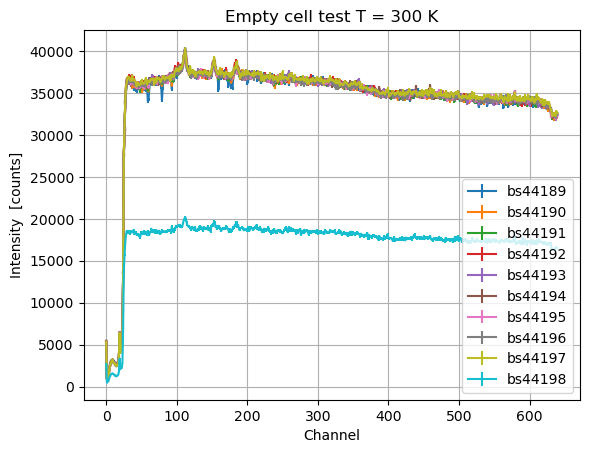

In [35]:
empty_cell_test, err_empty_cell_test = plot_raw_data('44189', 10,'Empty cell test T = 300 K')


# Test of sample 

- T = 300 K --> bs44199  

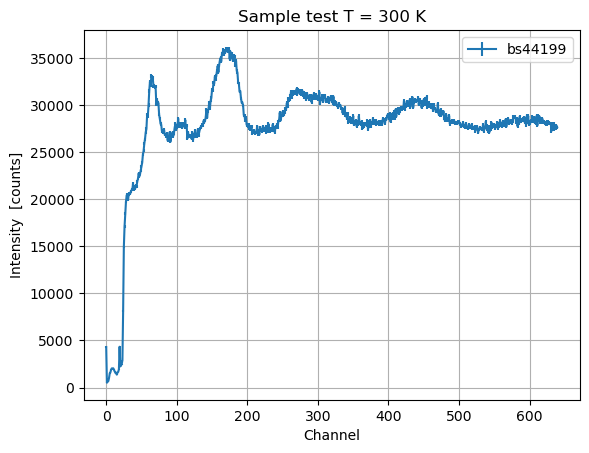

In [36]:
sample_test, err_sample_test = plot_raw_data('44199',1,'Sample test T = 300 K')

# Empty cell
- T = 800 K --> bs44200 - bs44210     
    - NOTE: 44201 misura interrotta   
- T = 300 K --> bs44211 - bs44224   
    -  NOTE: 44211 controllo in T non ottimale, 44216 acquisizione interrotta, 44217 errore nel lancio della sequenza di misura, 44224 acquisizione interrotta  

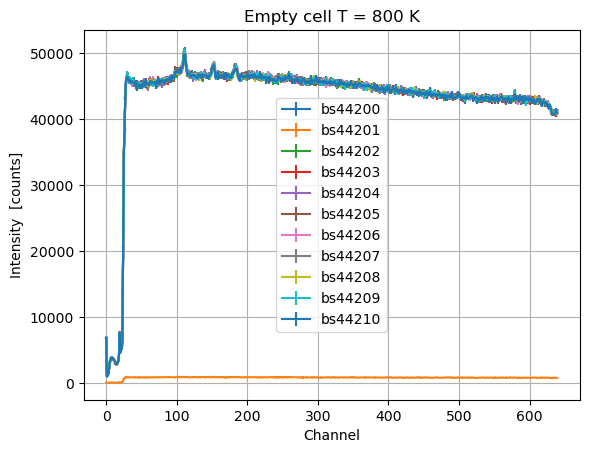

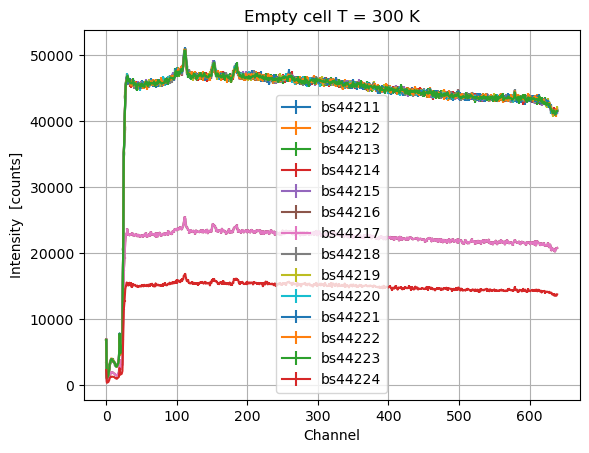

In [37]:
empty_cell_800K, err_empty_cell_800K = plot_raw_data('44200',11,'Empty cell T = 800 K')

empty_cell_300K, err_empty_cell_300K = plot_raw_data('44211',14,'Empty cell T = 300 K')
    


# Empty furnace


bs44384 - bs44389	



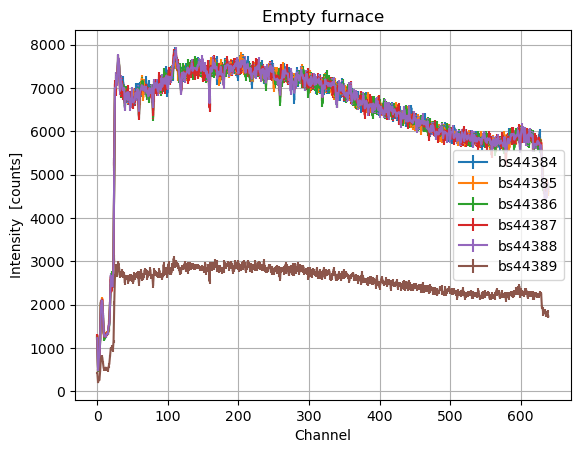

In [38]:

empty_furnace, err_empty_furnace = plot_raw_data('44384',6,'Empty furnace')

# VANADIUM 
bs44390 - bs44402

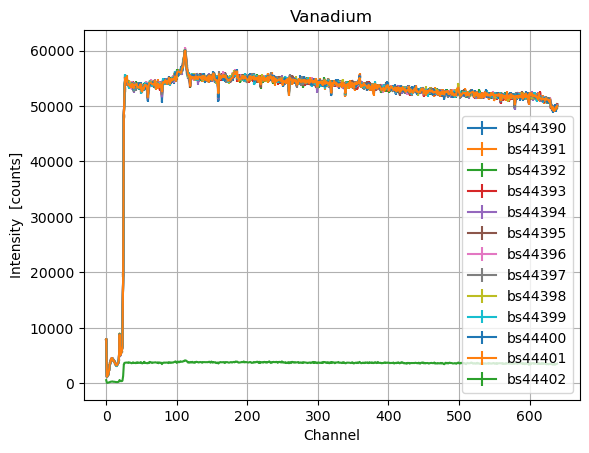

In [39]:

vanadium, err_vanadium = plot_raw_data('44390',13,'Vanadium')

# Sample


SAMPLE    T = 350 K --> bs44225 - bs 44237    NOTE: 44225 errore nel lancio della sequenza di misura, 44226 controllo in T troppo elevato, 44228 acquisizione interrotta  
          T = 500 K --> bs44238 - bs44247  
          T = 600 K --> bs44248 - bs44257  
          T = 700 K --> bs44258 - bs44267  
          T = 750 K --> bs44268 - bs44278    NOTE: 44272 misura interrotta per crash sistema  
          T = 800 K --> bs44279 - bs44291    NOTE: 44282 e 44283 misura interrotta per crash sistema, 44289,90 e 91 seganle anomalo  
          T = 850 K --> bs44291 - bs44295    NOTE: 44291 misura interrootta per crash sistema, 44292 detector spostato per verifica elettronica, 44293 misura interrotta per crash sistema  
          T = 900 K --> bs44296 - bs44308    NOTE: 44296 misura interrotta per sostituzione PC di acquisizione dati, 44308 acquisizione interrotta  
          T = 1000K --> bs44309 - bs44318  
          T = 1100K --> bs44319 - bs44330  



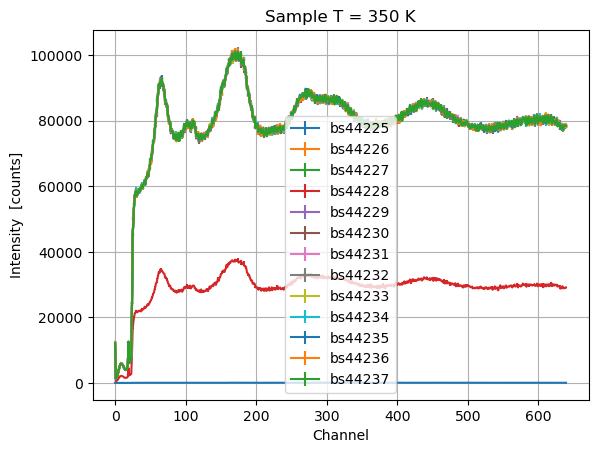

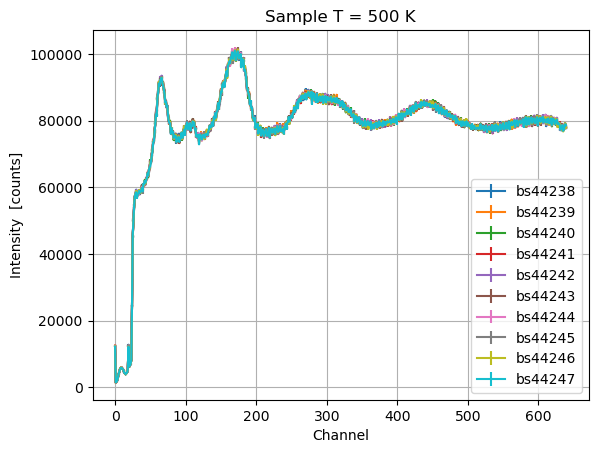

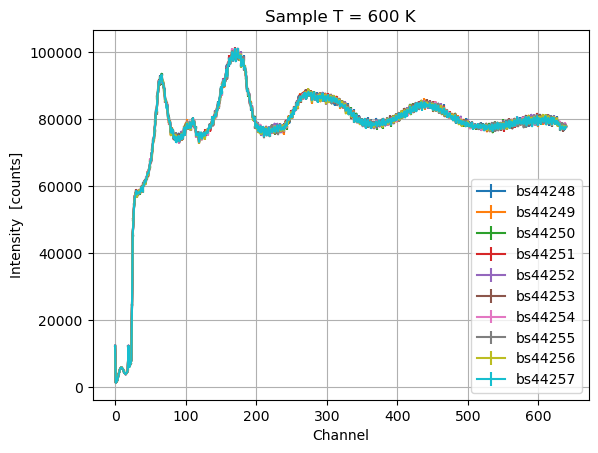

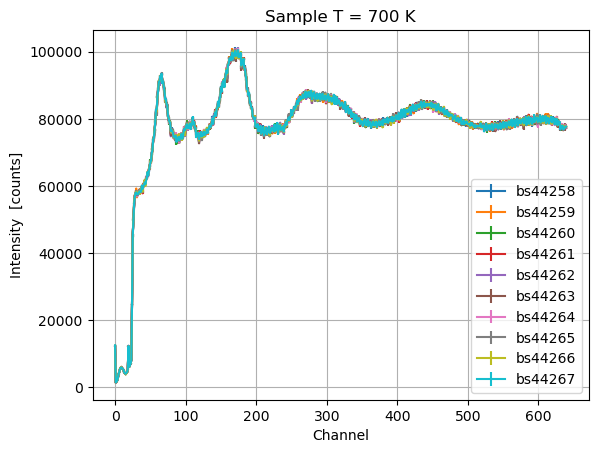

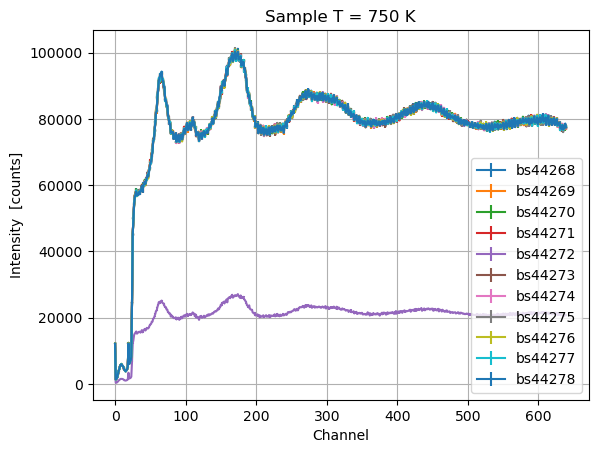

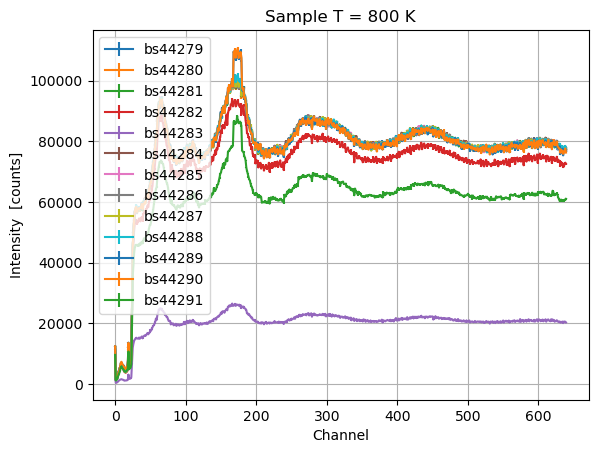

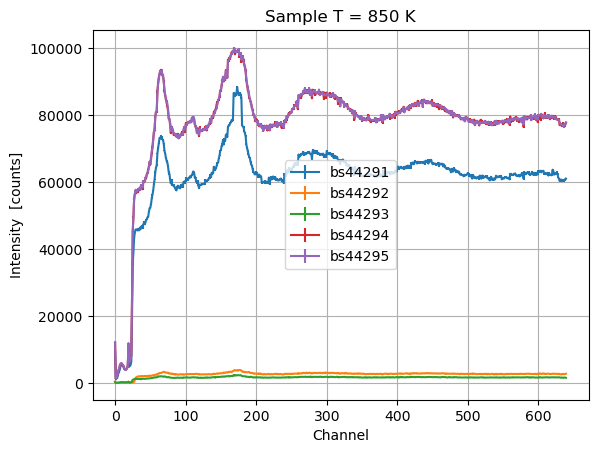

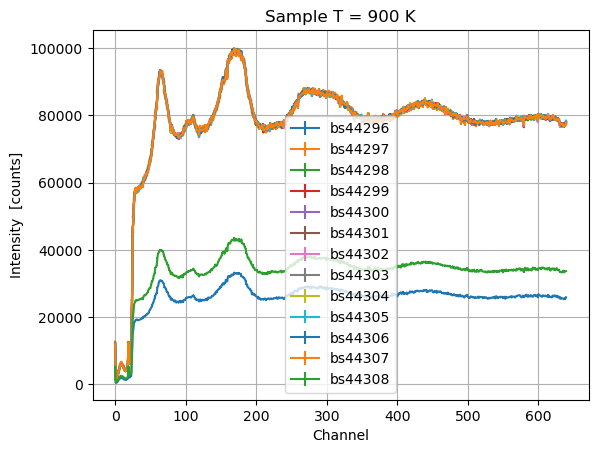

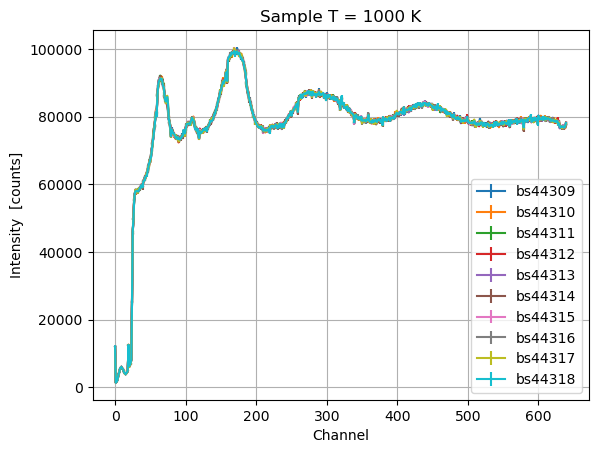

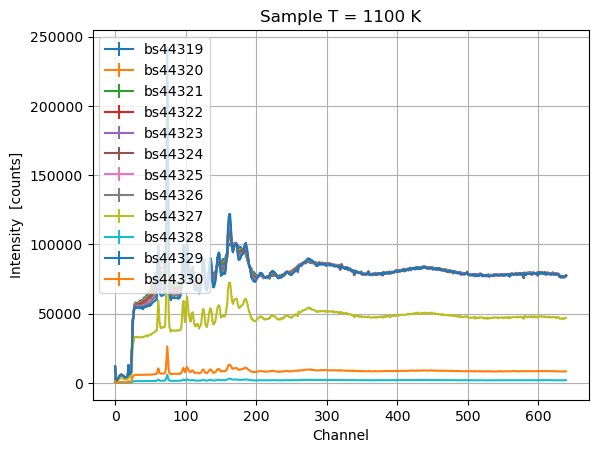

In [40]:
# T = 350 K

sample_300K, err_sample_300K = plot_raw_data(44225,13,'Sample T = 350 K')

# T = 500 K

sample_500K, err_sample_500K = plot_raw_data('44238',10,'Sample T = 500 K')

# T = 600 K

sample_600K, err_sample_600K = plot_raw_data('44248',10,'Sample T = 600 K')

# T = 700 K

sample_700K, err_sample_700K = plot_raw_data('44258',10,'Sample T = 700 K')

# T = 750 K

sample_750K, err_sample_750K = plot_raw_data('44268',11,'Sample T = 750 K')

# T = 800 K

sample_800K, err_sample_800K = plot_raw_data('44279',13,'Sample T = 800 K')

# T = 850 K

sample_850K, err_sample_850K = plot_raw_data('44291',5,'Sample T = 850 K')

# T = 900 K

sample_900K, err_sample_900K = plot_raw_data('44296',13,'Sample T = 900 K')

# T = 1000 K

sample_1000K, err_sample_1000K = plot_raw_data('44309',10,'Sample T = 1000 K')

# T = 1100 K

sample_1100K, err_sample_1100K = plot_raw_data('44319',12,'Sample T = 1100 K')


# Sample heating
bs44331 - bs44335

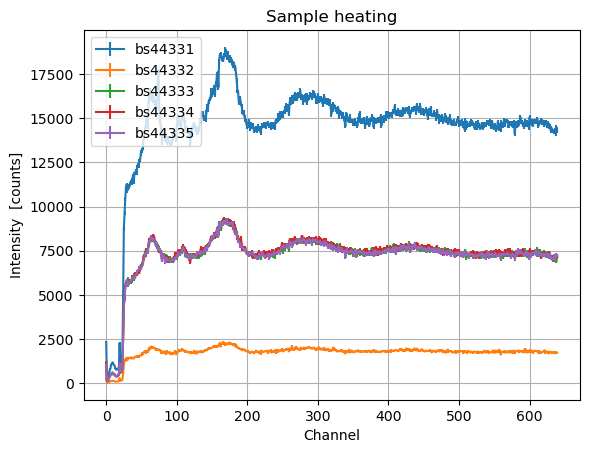

In [41]:

sample_heating, err_sample_heating = plot_raw_data('44331',5,'Sample heating')

# Sample reprise

SAMPLE  T = 1400K --> bs44335 - bs44348  

        T = 1350K --> bs44349 - bs44358  
        
        T = 1325K --> bs44359	Tm=1400K M=200000   
                       bs44360	Tm=1325K M=2000000   
                       bs44361	Tm=1325K M=2000000    
                       bs44362	Tm=1400K M=200000  
                       bs44363	Tm=1325K M=1000000  
                       bs44364	Tm=1325K M=1000000  
                       bs44365	Tm=1325K M=1000000  
                       bs44366	Tm=1400K M=500000  
                       bs44367	Tm=1325K M=500000  
                       bs44368	Tm=1325K M=500000  
                       bs44369	Tm=1325K M=500000   
                       bs44370	Tm=1325K M=500000

        T = 1300K --> bs44371	Tm=1400K M=200000  
                      bs44372	Tm=1300K M=500000  
                      bs44373	Tm=1300K M=5000000  
                      bs44374	Tm=1300K M=5000000  

        T = 1200K --> bs44375  	
        T = 800 K --> bs44376	M=200000  
        T = 300 K --> bs44377 - bs44379  

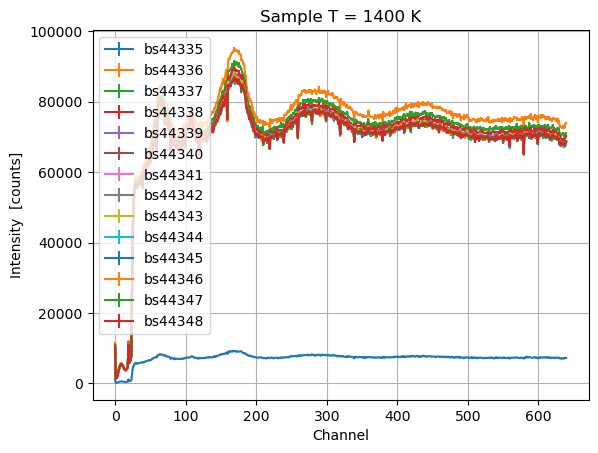

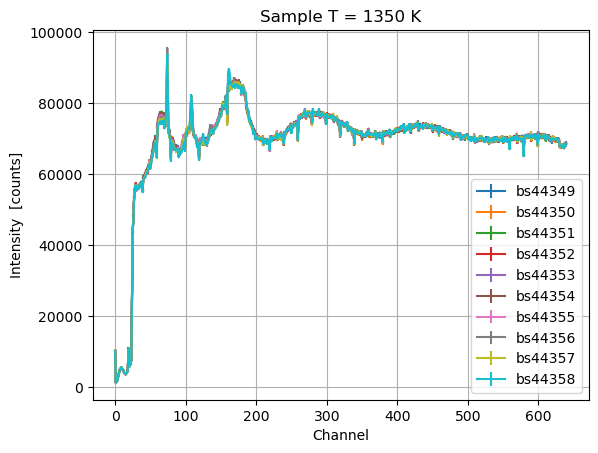

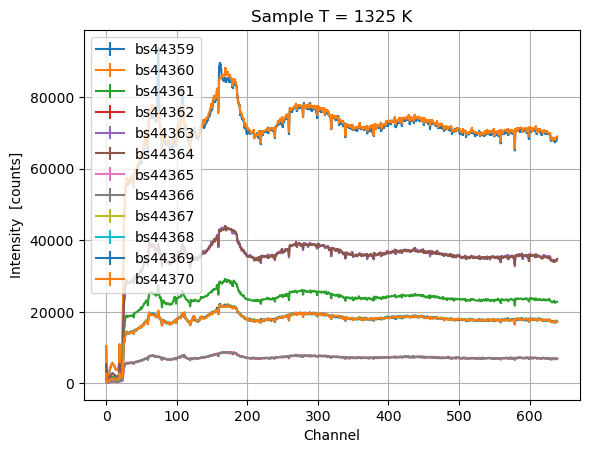

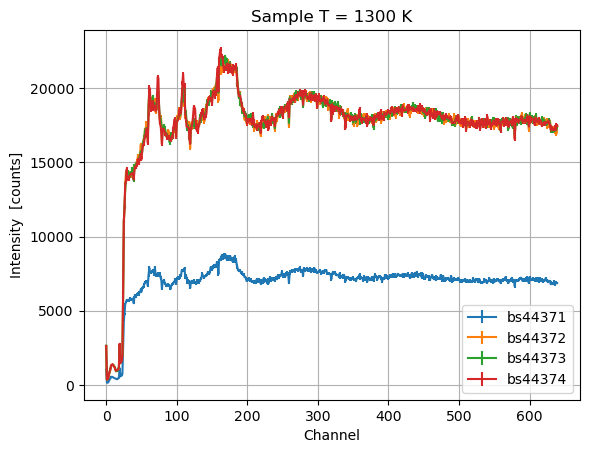

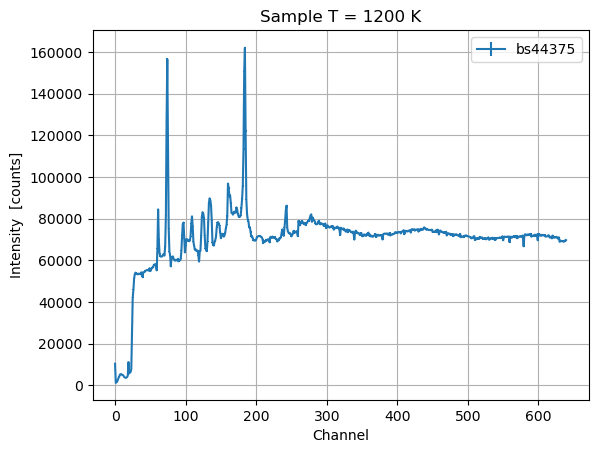

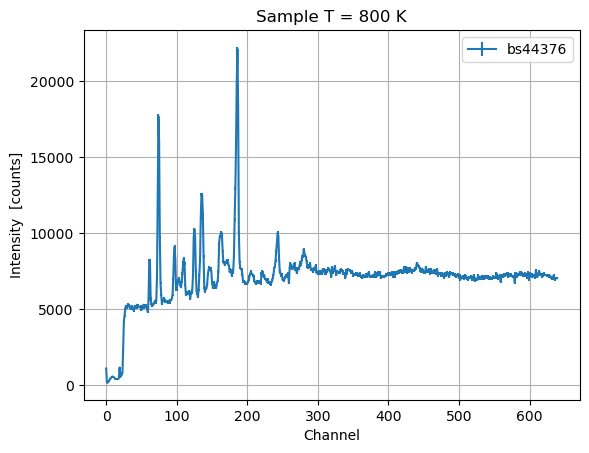

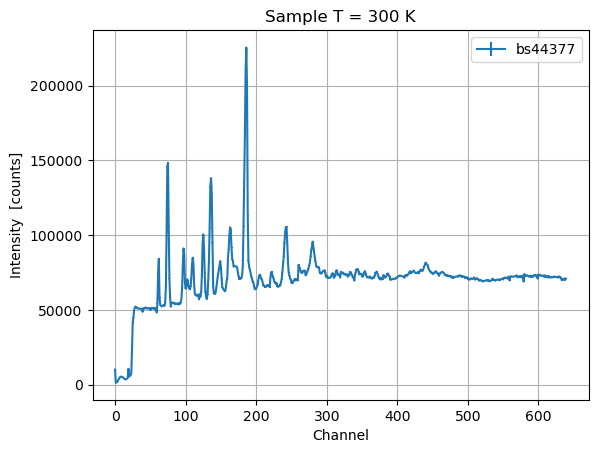

In [42]:
# T = 1400 K

sample_1400K, err_sample_1400K = plot_raw_data('44335',14,'Sample T = 1400 K')

# T = 1350 K

sample_1350K, err_sample_1350K = plot_raw_data('44349',10,'Sample T = 1350 K')

# T = 1325 K

sample_1325K, err_sample_1325K = plot_raw_data('44359',12,'Sample T = 1325 K') # 44366 è copia del 44365 perchè mancava

# T = 1300 K

sample_1300K, err_sample_1300K = plot_raw_data('44371',4,'Sample T = 1300 K')

# T = 1200 K

sample_1200K, err_sample_1200K = plot_raw_data('44375',1,'Sample T = 1200 K')

# T = 800 K

sample_800K, err_sample_800K = plot_raw_data('44376',1,'Sample T = 800 K')

# T = 1100 K

sample_300K, err_sample_300K = plot_raw_data('44377',1,'Sample T = 300 K')